# **Exploratory Data Analysis**


Importing Pandas


In [1]:
import pandas as pd

Loading Dataset


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


The column **ConvertedComp** contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Distribution Curve for **ConvertedComp**


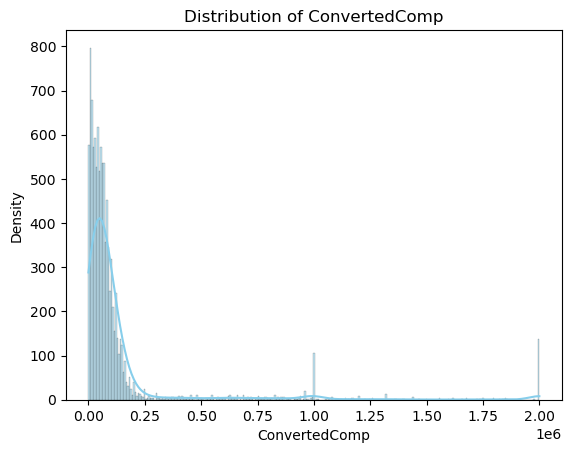

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

column_to_plot = df['ConvertedComp']

sns.histplot(column_to_plot, kde=True, color='skyblue')

plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.title('Distribution of ConvertedComp')

plt.show()

Histogram for **ConvertedComp**


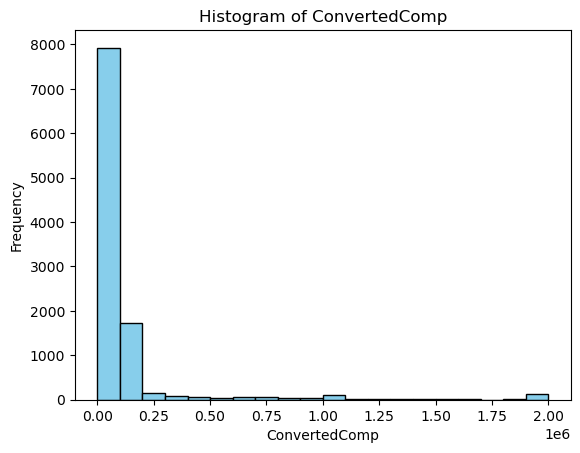

In [5]:
plt.hist(column_to_plot, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')

plt.show()

Median of **ConvertedComp**

In [6]:
# your code goes here
column_to_plot.median()

57745.0

How many responders identified themselves only as a **Man**?
How many responders identified themselves only as a **Woman**?

In [10]:
gender_counts = df['Gender'].value_counts()

man_count = gender_counts.get('Man', 0)
woman_count = gender_counts.get('Woman', 0)

print("Number of responders who idefntified as Men:", man_count)
print("Number of responders who idefntified as Women:", woman_count)


Number of responders who idefntified as Men: 10480
Number of responders who idefntified as Women: 731


Median **ConvertedComp** for those who identified themselves only as a **Woman**


In [11]:
woman_df = df[df['Gender'] == 'Woman']

median_converted_comp_woman = woman_df['ConvertedComp'].median()

print("Median ConvertedComp for responders identified as Woman:", median_converted_comp_woman)

Median ConvertedComp for responders identified as Woman: 57708.0


Five Number Summary for **Age**


In [12]:
five_number_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

print("Five-number summary for the 'Age' column:")
print(five_number_summary_age[['min', '25%', '50%', '75%', 'max']])

Five-number summary for the 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Histogram of **Age**


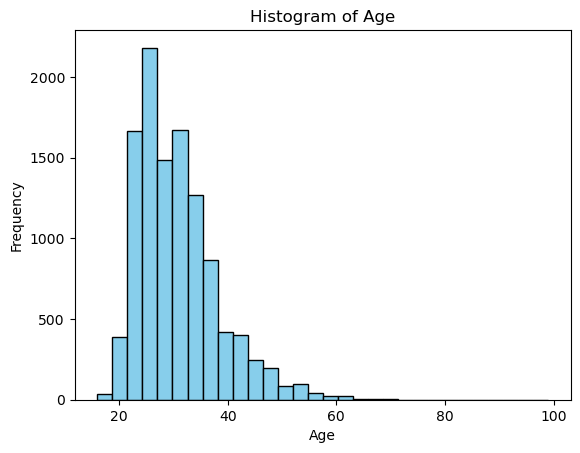

In [14]:
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()

## Outliers


Boxplot for **ConvertedComp**


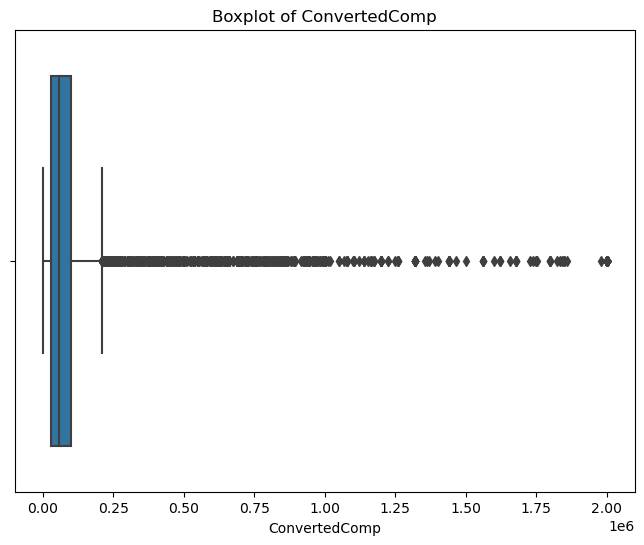

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ConvertedComp', data=df, orient='h')
plt.title('Boxplot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.show()

Interquartile Range for **ConvertedComp**

In [16]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Upper and Lower Bounds:


In [17]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound for ConvertedComp:", upper_bound)
print("Lower Bound for ConvertedComp:", lower_bound)

Upper Bound for ConvertedComp: 209698.0
Lower Bound for ConvertedComp: -82830.0


Counting Outliers:


In [18]:
outliers = (df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)

num_outliers = outliers.sum()

print("Number of outliers in ConvertedComp:", num_outliers)


Number of outliers in ConvertedComp: 879


Removing Outliers:


In [19]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_no_outliers['ConvertedComp'].median()

52704.0

## Correlation


Correlation between **Age** and other columns:


In [20]:
age_corr = df.corrwith(df['Age'])

print("Correlation between Age and other numerical columns:")
print(age_corr)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64
